# Contour features 

dict_items([('m00', 5575.5), ('m10', 383803.6666666666), ('m01', 279202.0), ('m20', 29970200.416666664), ('m11', 19929676.291666664), ('m02', 18577736.75), ('m30', 2509172870.8), ('m21', 1549590762.4833333), ('m12', 1341590241.35), ('m03', 1482037060.7), ('mu20', 3550102.748874046), ('mu11', 710099.3316331841), ('mu02', 4596254.048179535), ('mu30', -42662429.13257408), ('mu21', -48977500.64838508), ('mu12', -8374029.154776275), ('mu03', 91398032.52438426), ('nu20', 0.11420188766473786), ('nu11', 0.022842911836199218), ('nu02', 0.1478551257862252), ('nu30', -0.018379598899828615), ('nu21', -0.021100224139513266), ('nu12', -0.003607654326526446), ('nu03', 0.03937561016067528)])


(-0.5, 129.5, 127.5, -0.5)

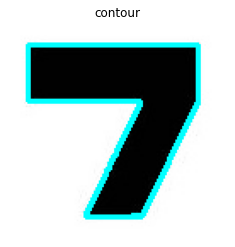

In [3]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./image/cropped.jpg')
image2 = image.copy()
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#THRESH_BINARY_INV : 픽셀값이 thresh 값보다 크면 0 적용, 아니면 maxval
ret, thresh = cv2.threshold(image_gray,127, 255, cv2.THRESH_BINARY_INV)

#contours line중 가장 바깥쪽 Line만 찾음.
contours, h = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours, -1, (0,255,255), 2)

#이미지 모멘트 - 공간 모멘트, 중심 모멘트, 평준화된 중신 모멘트 
c0 = contours[0]
M = cv2.moments(c0)
print(M.items())

plt.title('contour')
plt.imshow(image)
plt.axis('off')

이렇게 얻은 Moments로 대표적으로 해당 Contours의 중심점을 다음과 같은 방법으로 구할 수 있다.

C_x = M_10 / M_00<br>
C_y = M_01 / M_00

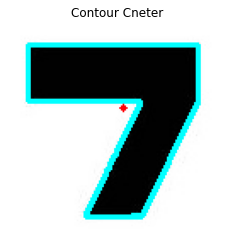

In [5]:
image_copy = image.copy()

# 중심값 구하기
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
cv2.circle(image_copy, (cx, cy), 2, (255,0,5), -1)

plt.imshow(image_copy)
plt.title("Contour Cneter")
plt.axis('off')
plt.show()

## Ectream Point
Monets와 별대로 해당 Contour의 최남단, 최북단, 최동단, 최서단을 다음과 같이 구할 수 있다.

In [9]:
#ndarray.argmin() : 최소값의 색인 위치
#ndarray.argmax() : 최대값의 색인 위치
leftmost = tuple(c0[c0[:, :, 0].argmin()][0]) #최소값
leftmost 
#print(type(c0)) #ndarray 

(12, 13)

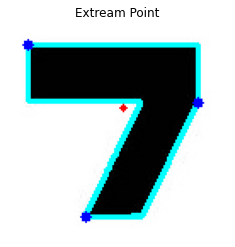

In [10]:
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])


cv2.circle(image_copy, (leftmost[0],leftmost[1]), 3, (0,0,255), -1)
cv2.circle(image_copy, (rightmost[0],rightmost[1]), 3, (0,0,255), -1)
cv2.circle(image_copy, (topmost[0],topmost[1]), 3, (0,0,255), -1)
cv2.circle(image_copy, (bottommost[0],bottommost[1]), 3, (0,0,255), -1)


plt.imshow(image_copy)
plt.title("Extream Point")
plt.axis('off')
plt.show()

## Contour Area
Contour Area는 폐곡선 형태의 Contour로 둘러쌓인 부분의 면적을 의미한다. 해당 Contour의 면적은 Moments에서 "m00"을 통해 구할 수 있다. 마찬가지로 contourArea 함수를 통해 구할 수도 있다. <br><br>

cv2.contourArea(contour [, oriented]) → retval
위 함수는 Contour의 면적을 구하는 함수이다. 모멘트와 비슷하게 Green 공식(미적분에서 적분을 이용해 면적을 구하는 공식)을 이용하여 이 면적을 구한다. 그러므로 drawContours나 fillPoly 함수를 사용해 윤곽선을 그리는 경우, 반환되는 면적과 0이 아닌 픽셀들의 수는 다를 수도 있다. 또한 이 함수는 주로 교차되어 있는 Contours에 대해서는 잘못된 결과를 반환할 수도 있다. 2차원 포인터의 배열을 contour의 인자로 입력받는다.

In [11]:
M['m00'] 

5575.5

In [13]:
cv2.contourArea(c0)

5575.5

## cv2.arcLength(curve, closed) → retval
첫번째 인자로 Moments 함수나 contourArea 함수와 마찬가지로 2차원 포인터의 배열을 curve의 인자로 입력받는다. 두번째 인자로 길이를 구하고자 하는 곡선이 폐곡선인지 아닌지를 boolean 형태로 입력받는다. 폐곡선일 경우 True를 인자로 전달하고, 아닐 경우 False를 인자로 전달하면 된다.

In [14]:
cv2.arcLength(c0, closed=True) # 폐곡선 True, 페곡선 아님 False

429.23758828639984

In [15]:
cv2.arcLength(c0, closed=False)

329.23758828639984

In [20]:
def onChange(x):
    return int(x)

def ContoursFeature():
    img = cv2.imread('./image/hangul.jpg')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
    
    cv2.namedWindow('contours')
    cv2.createTrackbar('index', 'contours', 0, 16, onChange)
    contours, hierarchy = cv2.findContours(thr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    while True:
        img_copy = img.copy()

        index = cv2.getTrackbarPos('index', 'contours')
        cnt = contours[index]
        cv2.drawContours(img_copy, [cnt], 0, (0, 255, 255), 3)
        
        M = cv2.moments(cnt)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
        rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
        topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
        bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])
        cv2.circle(img_copy, (cx, cy), 3, (255, 0, 0), -1)
        cv2.circle(img_copy, (leftmost[0], leftmost[1]), 3, (0, 0, 255), -1)
        cv2.circle(img_copy, (rightmost[0], rightmost[1]), 3, (0, 0, 255), -1)
        cv2.circle(img_copy, (bottommost[0], bottommost[1]), 3, (0, 0, 255), -1)
        cv2.circle(img_copy, (topmost[0], topmost[1]), 3, (0, 0, 255), -1)
        
        print("-----------------------------")
        print((index+1), "번째 Contour의 면적 : ", cv2.contourArea(cnt))
        print((index+1), "번째 Contour의 길이 : ", cv2.arcLength(cnt, closed=True))
        
        cv2.imshow('contours', img_copy)
            
        k = cv2.waitKey(0) & 0xFF
        if k == 27:
            break
        
    print("-----------------------------")    
    cv2.destroyAllWindows()

In [21]:
ContoursFeature()

-----------------------------
1 번째 Contour의 면적 :  9171.5
1 번째 Contour의 길이 :  356.89444279670715
-----------------------------
2 번째 Contour의 면적 :  8418.5
2 번째 Contour의 길이 :  501.899494767189
-----------------------------
3 번째 Contour의 면적 :  902.5
3 번째 Contour의 길이 :  220.72792184352875
-----------------------------
4 번째 Contour의 면적 :  271.5
4 번째 Contour의 길이 :  83.41421353816986
-----------------------------
5 번째 Contour의 면적 :  6182.5
5 번째 Contour의 길이 :  557.2375881671906
-----------------------------
6 번째 Contour의 면적 :  7331.0
6 번째 Contour의 길이 :  542.2497808933258
-----------------------------


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def onChange(x):
    return int(x)
def ContourFeature():
    img = cv2.imread('./image/hangul.jpg')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
    
    
    cv2.namedWindow('contours')
    cv2.createTrackbar('index', 'contours', 0, 16, onChange)
    contours , h = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    while True:
        img_copy = img.copy()

        index = cv2.getTrackbarPos('index', 'contours')
        cnt = contours[index]
        cv2.drawContours(img_copy, [cnt], 0, (255,255,0),3)

        M = cv2.moments(cnt)
        
        #중심점 구하기
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])

        leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
        rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
        topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
        bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])


        cv2.circle(img_copy, (cx, cy), 2, (0,255,255), -1) #중심점
        cv2.circle(img_copy,(leftmost[0],leftmost[1]), 2, (0,255,255), -1)
        cv2.circle(img_copy,(rightmost[0],rightmost[1]), 2, (0,255,255), -1)
        cv2.circle(img_copy,(topmost[0],topmost[1]), 2, (0,255,255), -1)
        cv2.circle(img_copy,(bottommost[0],bottommost[1]), 2, (0,255,255), -1)

        print(cv2.contourArea(cnt))
        print(cv2.arcLength(cnt, closed=True))

        cv2.imshow('contours', img_copy)

        k = cv2.waitKey(0) & 0xFF
        if k == 27:
            break

    print("-----------------------------")    
    cv2.destroyAllWindows()

In [2]:
ContourFeature()

9171.5
356.89444279670715
1188.0
135.65685415267944
9171.5
356.89444279670715
1188.0
135.65685415267944
8418.5
501.899494767189
1188.0
135.65685415267944
902.5
220.72792184352875
271.5
83.41421353816986
-----------------------------


## cv2.approxPolyDP(curve, epsilon, closed [, approxCurve]) → approxCurve
이 함수는 기존의 곡선, 다각형을 더 적은 꼭짓점을 가진 곡선, 다각형으로 근사하여 이들 사이의 거리가 지정된 정밀도보다 작거나 같게 한다. Douglas-Peucker 알고리즘을 사용하여 원래 곡선과 근사화된 곡선 사이의 최대 거리를 기반으로 "dissimilar"를 정의한다. 단순화된 곡선은 원래 곡선에서 정의된 점들의 하위 집합으로 구성된다.

1. curve : 2차원 포인터의 벡터가 들어간다. 
2. epsilon(e, 오차) : 근사 정확도를 지정하는 파라미터로 기존의 곡선과 근사화된 곡선까지의 최대거리를 지정한다. 따라서 epsilon의 값을 최대한으로 하면서 꼭짓점을 줄여나가므로 이 파라미터의 값이 작을수록 원래의 곡선과 가까워져 비슷한 결과가 도출되고, 이 파라미터 값이 클 수록 기존의 곡선에서 멀어지므로 Contours의 갯수가 많이 줄어들어 보다 근본적인 형태에 더 가까워 진다. 다만 이 값이 너무 커지면 결국 꼭짓점의 갯수가 0인 점으로 돌아갈 수 있다.
3. closed : 해당 곡선이 폐곡선인지의 여부를 알려주는 파라미터이다. arcLength 함수의 파라미터와 마찬가지로 폐곡선이면 True, 폐곡선이지 않으면 False를 전달한다.



In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./image/cropped.jpg')
img1 = img.copy()
img2 = img.copy()
img3 = img.copy()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#THRESH_BINARY : 픽셀값이 thresh 값보다 크면 maxval 적용, 아니면 0
ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, h = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[1]
M = cv2.moments(cnt)

#cv2.drawContours(img, contours, -1(contourIdx), (0,0,255)(color),2(thickness)
# image – 원본 이미지
# contours – contours정보.
# contourIdx – contours list type에서 몇번째 contours line을 그릴 것인지. -1 이면 전체
# color – contours line color
# thickness – contours line의 두께.

cv2.drawContours(img, [cnt], -1, (255,255,0),2)

epsilon1 = 0.05 * cv2.arcLength(cnt, True)
epsilon2 = 0.08 * cv2.arcLength(cnt, True)
epsilon3 = 0.1 * cv2.arcLength(cnt, True)

print('Original', cv2.arcLength(cnt, True))
print('epsilon 0.05', epsilon1)
print('epsilon 0.08', epsilon2)
print('epsilon 0.1', epsilon3)
print()

Original 434.89444231987
epsilon 0.05 21.7447221159935
epsilon 0.08 34.791555385589604
epsilon 0.1 43.489444231987

